# Exploratory Data Analysis
---
Goal of the notebook: Do EDA to determine which black box model to select.

Inputs of the notebook:

Output of the notebook:


Takeaways:

Questions, thoughts and remarks:

## Dependencies and path
Adjust the argument in `sys.path.append` to align with your specific requirements.

In [15]:
import pandas as pd 
import numpy as np
import os
import sys

%load_ext autoreload
%autoreload 2

os.chdir('C:/Users/dorab/OneDrive - Ecole Polytechnique/Documents/Data Science for Business HEC x Polytechnique/Year 2/Algorithmic Fairness and Interpretability/final_project/afi_final_project')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load the data

In [17]:
df = pd.read_excel("data/dataproject2024.xlsx")

## 2. Overview

In [19]:
# Overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7430 non-null   int64  
 1   Job tenure            7430 non-null   int64  
 2   Age                   7430 non-null   int64  
 3   Car price             7430 non-null   int64  
 4   Funding amount        7430 non-null   int64  
 5   Down payment          7430 non-null   int64  
 6   Loan duration         7430 non-null   int64  
 7   Monthly payment       7430 non-null   float64
 8   Credit event          7430 non-null   int64  
 9   Married               7430 non-null   int64  
 10  Homeowner             7430 non-null   int64  
 11  Default (y)           7430 non-null   int64  
 12  Pred_default (y_hat)  7430 non-null   int64  
 13  PD                    7430 non-null   float64
 14  Group                 7430 non-null   int64  
dtypes: float64(2), int64(

In [23]:
# Summary statistics of numerical columns
print(df.describe())

                ID   Job tenure          Age     Car price  Funding amount  \
count  7430.000000  7430.000000  7430.000000   7430.000000     7430.000000   
mean   3715.500000     9.329475    45.169717  12931.183311    11457.803769   
std    2145.000583     9.978638    14.790760   6202.407112     6015.033981   
min       1.000000     0.000000    18.000000    546.000000      546.000000   
25%    1858.250000     2.000000    33.000000   8147.750000     6845.250000   
50%    3715.500000     5.000000    46.000000  11950.000000    10382.500000   
75%    5572.750000    15.000000    55.000000  16500.000000    15000.000000   
max    7430.000000    58.000000    89.000000  47051.000000    30000.000000   

       Down payment  Loan duration  Monthly payment  Credit event  \
count   7430.000000    7430.000000      7430.000000   7430.000000   
mean       0.089367      56.220054         0.105143      0.022073   
std        0.285293      19.385787         0.061121      0.146930   
min        0.000000  

## 3. Distribution

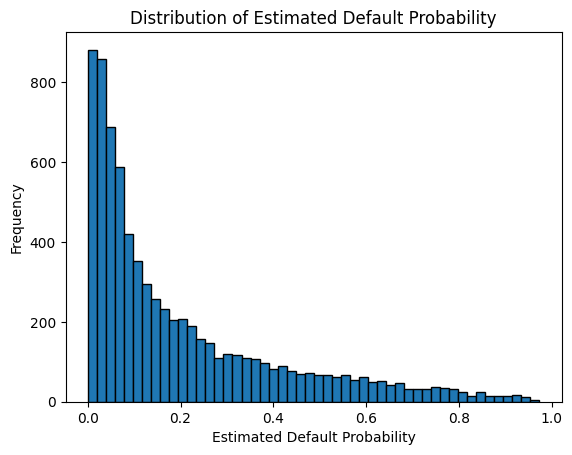

In [28]:
import matplotlib.pyplot as plt

# Histogram using matplotlib
plt.hist(df["PD"], bins=50, edgecolor="black")
plt.title("Distribution of Estimated Default Probability")
plt.xlabel("Estimated Default Probability")
plt.ylabel("Frequency")
plt.show()

Very skewed to the right.

## 4. Correlation

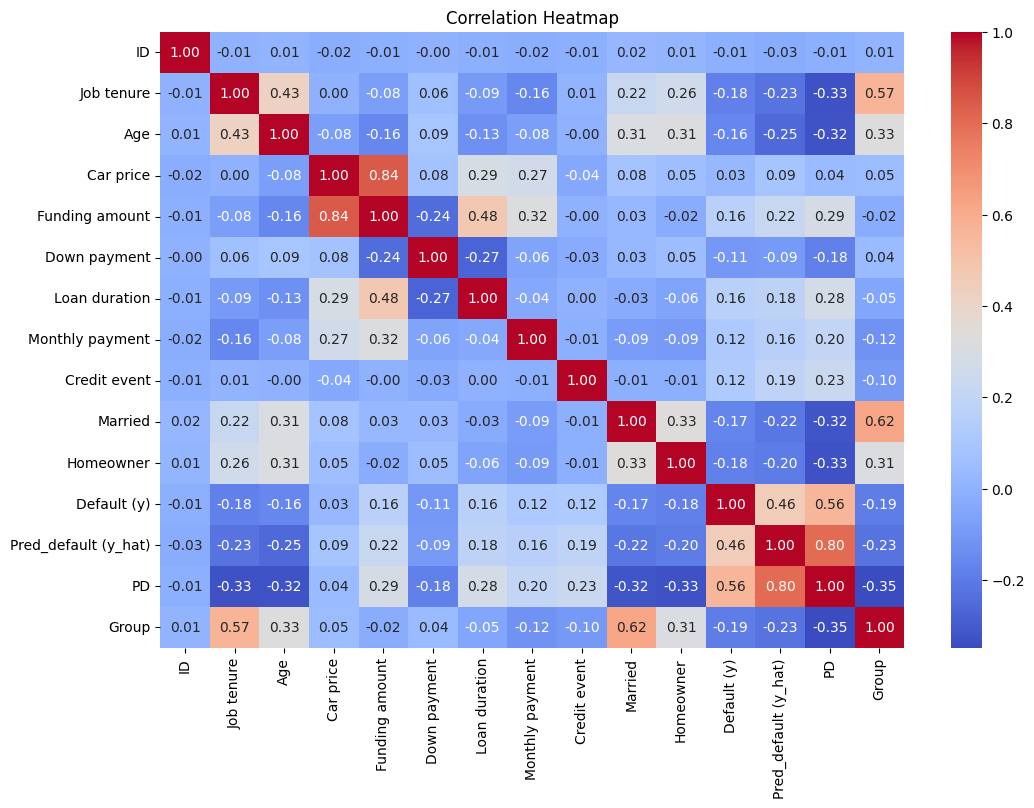

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Quite some correlated features:
- group + job tenure
- group + married
- homeowner + married
- loan duration + funding amount +  car price + monthly payment


We expect the features with the highest importance to be:
- job tenure
- age
- married
- homeowner
- group
- also loan duration and funding amount (but slightly less)

## 5. Multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df.drop("PD", axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]

print(vif_data)

                 feature        VIF
0                     ID   3.592593
1             Job tenure   3.406223
2                    Age  10.183947
3              Car price  27.902986
4         Funding amount  30.490185
5           Down payment   1.657359
6          Loan duration   9.725592
7        Monthly payment   4.299240
8           Credit event   1.095462
9                Married   4.080311
10             Homeowner   2.007662
11           Default (y)   1.645297
12  Pred_default (y_hat)   1.624522
13                 Group   3.546720


Quite a few features have very high VIF values (age, car price, funding amount, loan duration) indicating that there is multicollinearity between our features. This means that we should prefer tree-based algorithms to a linear regression or logistic regression. If we do linear regression we should consider applying a ridge regression or lasso to remove some correlated features.